<a href="https://colab.research.google.com/github/mcomertg/cc21fall2-_-R-Programing/blob/main/Module_08_Lab_07_K_Means_Clustering_in_R___.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('tidymodels')
install.packages('dplyr')
install.packages('NbClust')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘sparsevctrs’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidymodels)
library(dplyr)
library(NbClust)

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.1
✔ dials        1.4.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.0     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



In [ ]:
# Data Loading
data <- read.csv('/content/lodgepole_data.csv')
head(data)

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_area,soil_type,lodgepole_pine
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,2511,92,7,182,18,722,231,229,131,5494,wilderness_area_1,soil_type_18,0
2,2880,86,12,30,3,4369,237,221,113,5906,wilderness_area_1,soil_type_30,1
3,2733,133,16,228,79,1590,244,231,111,878,wilderness_area_1,soil_type_30,0
4,2858,125,8,268,7,3288,233,235,134,3034,wilderness_area_1,soil_type_12,1
5,2821,72,20,90,20,2889,238,198,82,2247,wilderness_area_1,soil_type_29,0
6,2744,122,19,30,1,2742,248,222,94,2232,wilderness_area_1,soil_type_29,0


In [ ]:
names(data)

[1] "elevation"                          "aspect"                            
 [3] "slope"                              "horizontal_distance_to_hydrology"  
 [5] "vertical_distance_to_hydrology"     "horizontal_distance_to_roadways"   
 [7] "hillshade_9am"                      "hillshade_noon"                    
 [9] "hillshade_3pm"                      "horizontal_distance_to_fire_points"
[11] "wilderness_area"                    "soil_type"                         
[13] "lodgepole_pine"

In [ ]:
# Split data into training and test sets
split <- initial_split(data, prop = 0.75, strata = lodgepole_pine)

training_set <- training(split) %>% select(horizontal_distance_to_hydrology,
                                           horizontal_distance_to_roadways,
                                           horizontal_distance_to_fire_points)

test_set <- testing(split) %>% select(horizontal_distance_to_hydrology,
                                       horizontal_distance_to_roadways,
                                       horizontal_distance_to_fire_points)

In [ ]:
# center and scale the features
test_set <- scale(test_set,
  center = apply(training_set, 2, mean),
  scale = apply(training_set, 2, sd))

training_set <- scale(training_set)

In [ ]:
head(training_set)

horizontal_distance_to_hydrology,horizontal_distance_to_roadways,horizontal_distance_to_fire_points
-0.4175593,-1.0489455,2.65233871
-0.8499102,0.3414661,0.19907869
-1.1318782,0.2471465,0.18774549
-0.8264129,1.5573543,-0.16056153
-1.0754846,1.5887942,-0.07140702
-0.7089262,2.0122698,-0.28371563


In [ ]:
head(test_set)

horizontal_distance_to_hydrology,horizontal_distance_to_roadways,horizontal_distance_to_fire_points
-0.2013839,-0.4920109,-0.8352647
-1.1318782,-1.1387736,-0.3789145
-1.1318782,1.4816420,0.2277895
0.8747938,1.4944746,0.1817011
0.2826611,0.3818887,-0.5050908
-0.6901284,-0.9610422,-0.5753566


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


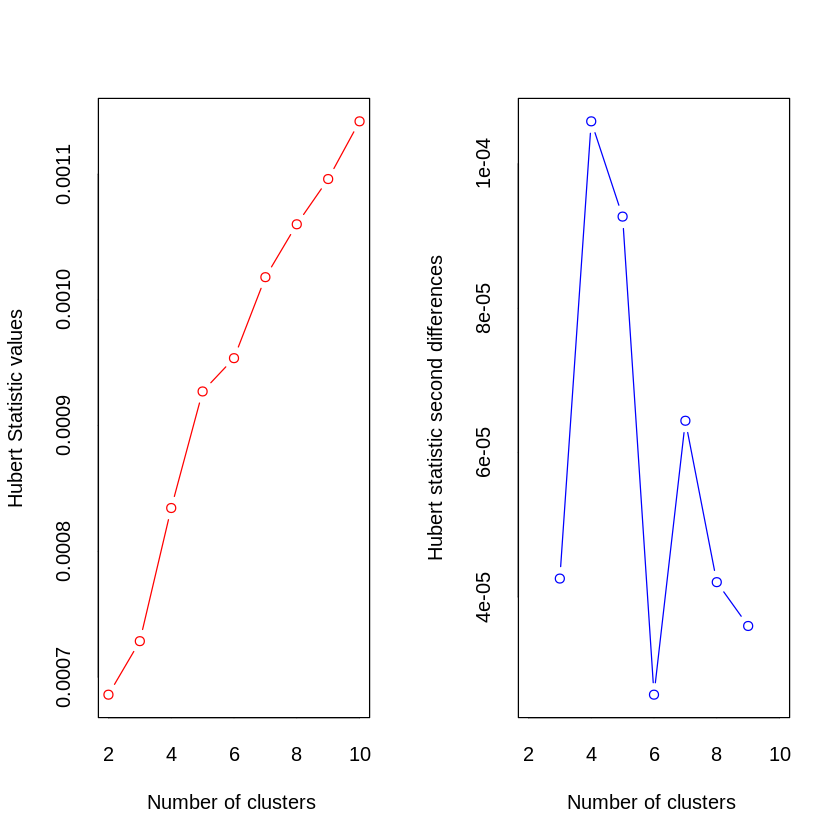

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 8 proposed 4 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


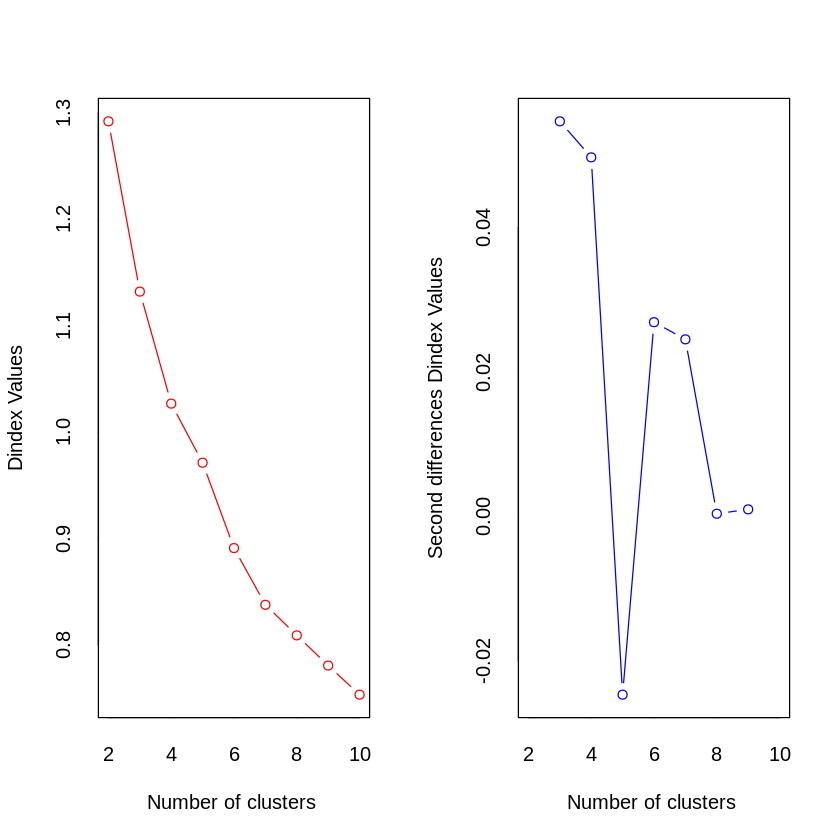

In [ ]:
# Determine Optimal Number of Clusters
# Use NbClust to suggest the optimal number of clusters
set.seed(123)
nc <- NbClust(training_set[sample(nrow(training_set), 1000), ],
              min.nc = 2, max.nc = 10, method = "kmeans")

In [ ]:
# Use suggested k-means with 4 clusters
km_clusters <- kmeans(training_set, centers = 4)

In [ ]:
cluster_number <- data.frame(cluster_number = km_clusters$cluster)
training_set_with_cluster_num <- cbind(training_set, cluster_number)
head(training_set_with_cluster_num)


,horizontal_distance_to_hydrology,horizontal_distance_to_roadways,horizontal_distance_to_fire_points,cluster_number
,<dbl>,<dbl>,<dbl>,<int>
1,-0.4175593,-1.0489455,2.65233871,4
2,-0.8499102,0.3414661,0.19907869,2
3,-1.1318782,0.2471465,0.18774549,1
4,-0.8264129,1.5573543,-0.16056153,2
5,-1.0754846,1.5887942,-0.07140702,2
6,-0.7089262,2.0122698,-0.28371563,2


# EXERCISES

In [ ]:
# Cluster sizes
print('Cluster Sizes:')
table(km_clusters$cluster)
cat("\n -------- \n\n")

# Cluster Centers
print('Cluster Centers:')
km_clusters$centers

[1] "Cluster Sizes:"



   1    2    3    4 
3212 1304 1266  754 


 -------- 

[1] "Cluster Centers:"


,horizontal_distance_to_hydrology,horizontal_distance_to_roadways,horizontal_distance_to_fire_points
1,-0.4726654,-0.6142228,-0.39643040
2,-0.2269174,1.2629250,-0.17070810
3,1.4896406,-0.2947757,-0.08389443
4,-0.0952034,0.9273412,2.12486493


In [ ]:
# Mean of each variable
aggregate(training_set, by = list(km_clusters$cluster), mean)

Group.1,horizontal_distance_to_hydrology,horizontal_distance_to_roadways,horizontal_distance_to_fire_points
<int>,<dbl>,<dbl>,<dbl>
1,-0.4726654,-0.6142228,-0.39643040
2,-0.2269174,1.2629250,-0.17070810
3,1.4896406,-0.2947757,-0.08389443
4,-0.0952034,0.9273412,2.12486493


In [ ]:
install.packages('clue')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#  Test Set Observations to Clusters
library(clue)

# Predict cluster assignments for the test set
test_clusters <- cl_predict(km_clusters, newdata = test_set)

# Print the predicted cluster assignments
print(test_clusters)

Class ids:
   [1] 1 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 3 3 3 1 1 2 1 4 1 3 4
  [38] 1 1 2 2 2 2 1 1 1 1 1 3 1 1 1 3 1 1 4 3 1 4 4 4 4 4 4 4 2 4 4 4 2 4 4 4 4
  [75] 4 4 4 4 2 4 4 4 4 2 4 2 4 2 2 4 4 4 4 4 2 2 4 4 4 2 2 4 4 4 4 4 2 2 2 2 4
 [112] 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 1 1 3 2 4 4 1 3 4 4 4 4 4 2 4 4 4 4 4 3 3 4
 [149] 4 3 4 4 4 4 1 2 4 4 4 4 4 4 4 4 2 4 1 4 3 4 4 2 4 4 1 3 4 4 4 4 3 4 4 4 4
 [186] 1 4 4 4 4 1 4 4 1 4 4 4 4 4 4 1 4 4 4 4 4 4 4 3 3 4 3 1 4 4 3 3 4 1 4 4 4
 [223] 4 1 4 4 4 4 1 4 3 1 4 4 4 1 4 4 4 1 1 1 4 1 4 4 4 2 4 4 1 4 3 4 4 4 4 4 1
 [260] 1 2 4 4 1 4 4 4 1 4 2 4 1 4 2 2 1 1 4 4 2 2 4 4 4 4 4 1 1 2 4 4 4 1 4 4 4
 [297] 1 1 1 1 1 1 4 2 1 4 4 4 4 4 1 4 1 1 1 4 2 3 2 2 3 2 4 2 2 4 4 1 1 2 1 4 1
 [334] 1 3 1 2 1 1 4 1 4 2 1 2 1 4 4 4 1 4 1 1 2 2 4 2 1 1 1 4 2 4 2 1 3 2 3 2 2
 [371] 1 1 1 2 2 1 1 1 4 2 2 4 3 1 2 2 1 3 1 3 1 1 1 1 1 4 2 1 2 2 1 3 3 2 2 3 2
 [408] 2 3 3 1 2 1 3 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 3 1 2 2 2 2 1 1 2 1 2
 [445] 2 1 2 1 4 

In [ ]:
test_clusters[1:5]

[1] 1 1 2 2 2

In [ ]:
rownames(test_set)

NULL